<a href="https://colab.research.google.com/github/Sir-ABD/linear_regression.py/blob/main/Crop_yield_model_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/archive (17).zip')

In [3]:
df.head()

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield
0,1626,9,636,11,1006,404
1,1959,9,73,11,112,115
2,1360,1,352,5,702,231
3,1794,2,948,7,299,537
4,1630,5,884,5,2733,554


In [8]:
df.describe()

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1263.095000,5.506667,498.801000,7.995333,1549.450333,328.099000
std,432.371756,2.855172,287.122742,2.621501,814.326919,145.036503
min,500.000000,1.000000,10.000000,4.000000,100.000000,46.000000
25%,896.000000,3.000000,242.000000,6.000000,869.750000,199.000000
50%,1277.000000,6.000000,505.000000,8.000000,1542.000000,332.000000
75%,1636.000000,8.000000,741.000000,10.000000,2225.000000,455.000000
max,2000.000000,10.000000,1000.000000,12.000000,3000.000000,628.000000


In [10]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   rainfall_mm         3000 non-null   int64
 1   soil_quality_index  3000 non-null   int64
 2   farm_size_hectares  3000 non-null   int64
 3   sunlight_hours      3000 non-null   int64
 4   fertilizer_kg       3000 non-null   int64
 5   crop_yield          3000 non-null   int64
dtypes: int64(6)
memory usage: 140.8 KB


,0
rainfall_mm,0
soil_quality_index,0
farm_size_hectares,0
sunlight_hours,0
fertilizer_kg,0
crop_yield,0


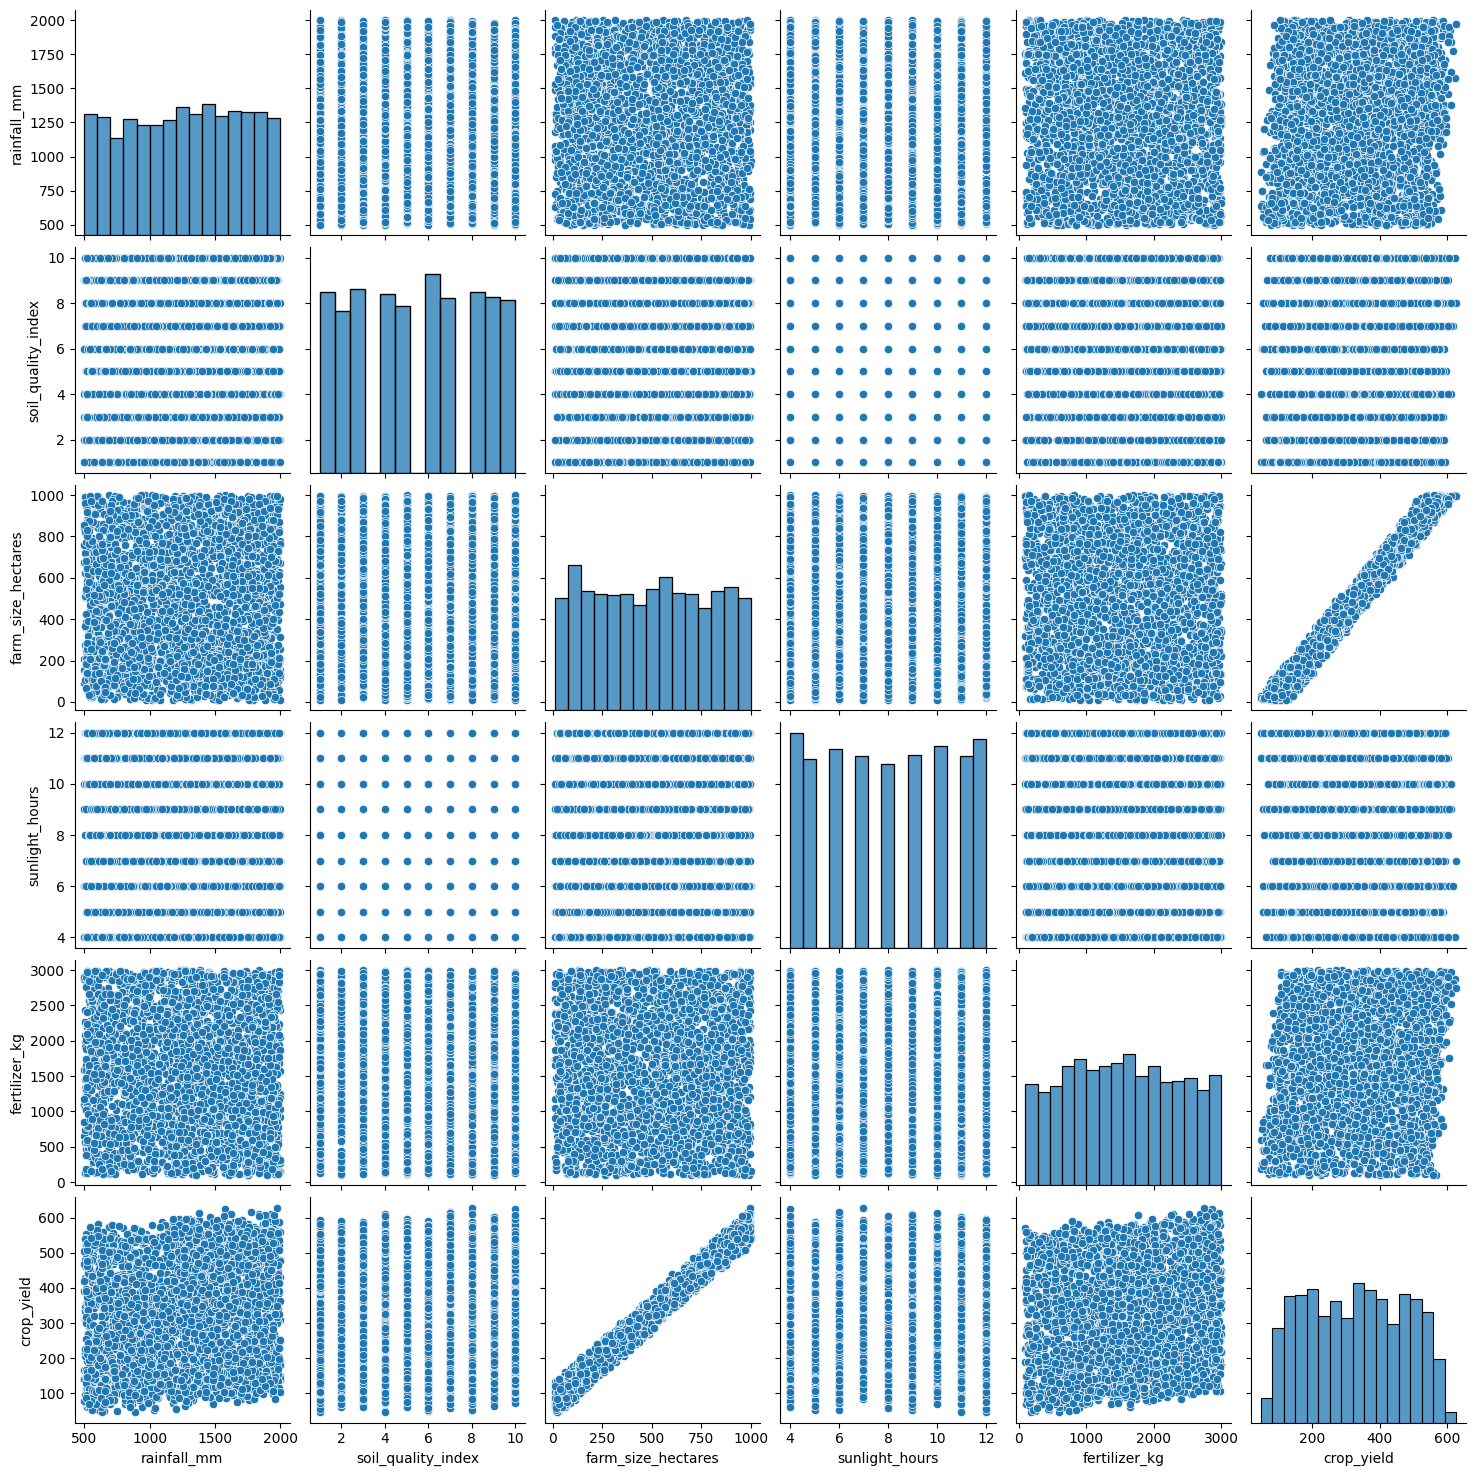

In [11]:
sns.pairplot(df)

In [17]:
df.dtypes

,0
rainfall_mm,int64
soil_quality_index,int64
farm_size_hectares,int64
sunlight_hours,int64
fertilizer_kg,int64
crop_yield,int64


<ipython-input-18-9882f5df6e3a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sunlight_hours'])


<Axes: xlabel='sunlight_hours', ylabel='Density'>

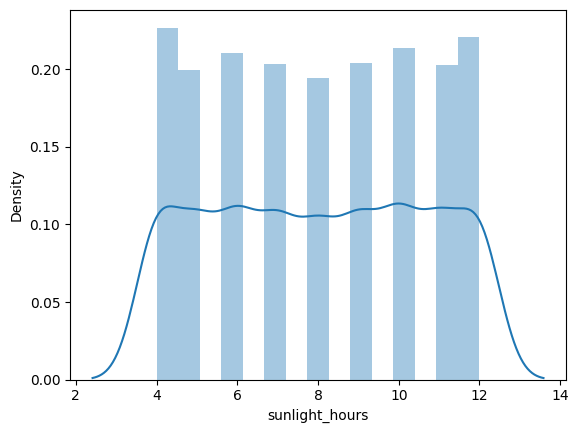

In [18]:
sns.distplot(df['sunlight_hours'])

In [19]:
df.corr()

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield
rainfall_mm,1.000000,-0.022198,0.001127,-0.005250,-0.029317,0.086339
soil_quality_index,-0.022198,1.000000,0.005829,0.002187,0.007254,0.043990
farm_size_hectares,0.001127,0.005829,1.000000,-0.010054,-0.008032,0.989201
sunlight_hours,-0.005250,0.002187,-0.010054,1.000000,0.016289,-0.006792
fertilizer_kg,-0.029317,0.007254,-0.008032,0.016289,1.000000,0.102023
crop_yield,0.086339,0.043990,0.989201,-0.006792,0.102023,1.000000


<Axes: >

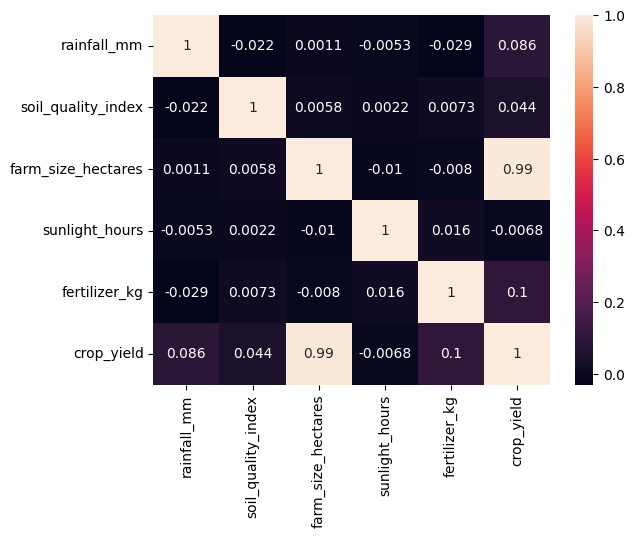

In [29]:
sns.heatmap(df.corr(), annot=True)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
X=df.drop('crop_yield', axis=1)
y=df['crop_yield']

In [39]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#model train
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
#prediction
y_pred = model.predict(X_test)

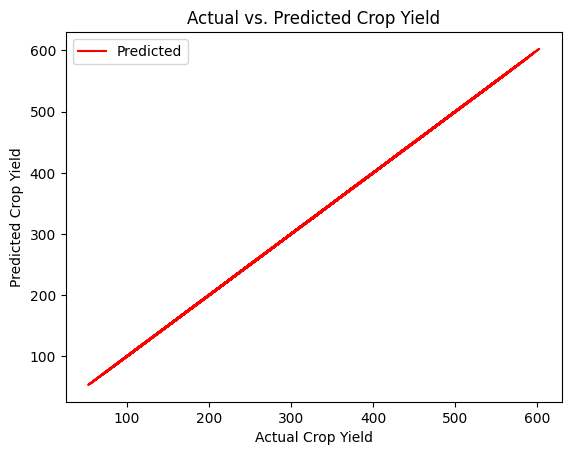

In [54]:
#visualize
plt.plot(y_test, y_pred, color='red')
plt.xlabel('Actual Crop Yield')
plt.ylabel('Predicted Crop Yield')
plt.title('Actual vs. Predicted Crop Yield')
plt.legend(['Predicted'])
plt.show()

In [57]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 0.0817605824141062
Root Mean Squared Error: 0.2859380744393901
R-squared: 0.9999961820468685


In [59]:
new_data=model.predict([[1626,9,636,11,1006]])
print(new_data)

[403.98515697]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
